### Exploratory Data Analysis
### Data Pre-Processing

In [2]:
import warnings
warnings.filterwarnings("ignore")
import pandas as pd

df_matches = pd.read_csv("matches.csv")
df_matches.head(2)

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
0,1,2017,Hyderabad,2017-04-05,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN
1,2,2017,Pune,2017-04-06,Mumbai Indians,Rising Pune Supergiant,Rising Pune Supergiant,field,normal,0,Rising Pune Supergiant,0,7,SPD Smith,Maharashtra Cricket Association Stadium,A Nand Kishore,S Ravi,NaN


In [3]:
df_deliveries = pd.read_csv("deliveries.csv")
df_deliveries.head(2)

,match_id,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,wide_runs,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind,fielder
0,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,1,DA Warner,S Dhawan,TS Mills,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN
1,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,2,DA Warner,S Dhawan,TS Mills,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN


In [4]:
print(df_matches.shape)
print(df_deliveries.shape)

(756, 18)
(179078, 21)




*   In matches data frame columns like umpire1,umpire2,umpire3 are not useful because these days they are using technology. So we cant decide which umpire is more useful for predicting anything related to match.
*   Date is also not useful because we already have season column which is also almost equal to date.



*   City and venue also not important features for this year IPL. Because IPL2020 is happening in UAE, only 2014 ipl was happened in UAE that to half season. But i am removing only venue it almost equal to city feature.
*   'Result' feature is almost equal to 'winner' feature. So i am dropping result column also.





In [5]:
df_matches = df_matches.drop(['venue','date','result','umpire1','umpire2','umpire3'], axis = 1) 
df_matches.head(2)

,id,season,city,team1,team2,toss_winner,toss_decision,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match
0,1,2017,Hyderabad,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,0,Sunrisers Hyderabad,35,0,Yuvraj Singh
1,2,2017,Pune,Mumbai Indians,Rising Pune Supergiant,Rising Pune Supergiant,field,0,Rising Pune Supergiant,0,7,SPD Smith


In [6]:
print(df_matches["team1"].value_counts())

Mumbai Indians                 101
Kings XI Punjab                 91
Chennai Super Kings             89
Royal Challengers Bangalore     85
Kolkata Knight Riders           83
Delhi Daredevils                72
Rajasthan Royals                67
Sunrisers Hyderabad             63
Deccan Chargers                 43
Pune Warriors                   20
Gujarat Lions                   14
Rising Pune Supergiant           8
Kochi Tuskers Kerala             7
Rising Pune Supergiants          7
Delhi Capitals                   6
Name: team1, dtype: int64


In [7]:
#In 2019 delhi daredevils name changed to delhi capitals. So i am replacing old name with new name for all the rows.
df_matches = df_matches.replace(to_replace ="Delhi Daredevils", value = "Delhi Capitals") 

df_deliveries = df_deliveries.replace(to_replace = "Delhi Daredevils", value = "Delhi Capitals")

#Rising pune supergiants name also printed in two ways. Lets change it to Rising pune supergiants.
df_matches = df_matches.replace(to_replace ="Rising Pune Supergiant", value = "Rising Pune Supergiants") 

df_deliveries = df_deliveries.replace(to_replace = "Rising Pune Supergiant", value = "Rising Pune Supergiants")

In [8]:
#checking null values in matches dataset
print(df_matches.isnull().sum())

id                 0
season             0
city               7
team1              0
team2              0
toss_winner        0
toss_decision      0
dl_applied         0
winner             4
win_by_runs        0
win_by_wickets     0
player_of_match    4
dtype: int64


In [9]:
#printing null rows in matches dataset
df1_null = df_matches[df_matches.isna().any(axis=1)]
df1_null.head(2)

,id,season,city,team1,team2,toss_winner,toss_decision,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match
300,301,2011,Delhi,Delhi Capitals,Pune Warriors,Delhi Capitals,bat,0,NaN,0,0,NaN
461,462,2014,NaN,Mumbai Indians,Royal Challengers Bangalore,Royal Challengers Bangalore,field,0,Royal Challengers Bangalore,0,7,PA Patel


In [10]:
#After seeing above table we can clearly understood that 4 matches are not played beacuse of rain, badlight or pitch condition. 
#So i am replacing those null values in winner column with no result and palyer of the match column null values with not declared.
df_matches["winner"].fillna("No result", inplace = True)
df_matches['player_of_match'].fillna("Not declared", inplace = True)
#city column also has 7 null values. I checked those matches data in Espn website and they played in Dubai.
df_matches["city"].fillna("Dubai", inplace = True)
print(df_matches.shape)

(756, 12)


In [11]:
#checking null values in deliveries dataset
print(df_deliveries.isnull().sum())

match_id                 0
inning                   0
batting_team             0
bowling_team             0
over                     0
ball                     0
batsman                  0
non_striker              0
bowler                   0
is_super_over            0
wide_runs                0
bye_runs                 0
legbye_runs              0
noball_runs              0
penalty_runs             0
batsman_runs             0
extra_runs               0
total_runs               0
player_dismissed    170244
dismissal_kind      170244
fielder             172630
dtype: int64




*   Player_dismissed, dismissal_kind and fielder features are having null values. But if you consider today questions only 'player_dismissed' and 'dismissal_kind' features are useful for today analysis. So i am removing "fielder" feature.
*   Filling player_dismissed null values with 'No wicket', dismissal_Kind null values with also No Wicket.



In [12]:
#dropping fielder column
df_deliveries = df_deliveries.drop(['fielder'], axis = 1) 
#filling null values
df_deliveries["player_dismissed"].fillna("No Wicket", inplace = True)
df_deliveries["dismissal_kind"].fillna("No Wicket", inplace = True)
df_deliveries.head(2)

,match_id,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,wide_runs,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind
0,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,1,DA Warner,S Dhawan,TS Mills,0,0,0,0,0,0,0,0,0,No Wicket,No Wicket
1,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,2,DA Warner,S Dhawan,TS Mills,0,0,0,0,0,0,0,0,0,No Wicket,No Wicket


In [13]:
# list of dtypes to include 
include =['float', 'int']
desc = df_deliveries.describe(include = include)
desc

,match_id,inning,over,ball,is_super_over,wide_runs,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs
count,179078.000000,179078.000000,179078.000000,179078.000000,179078.000000,179078.000000,179078.000000,179078.000000,179078.000000,179078.000000,179078.000000,179078.000000,179078.000000
mean,1802.252957,1.482952,10.162488,3.615587,0.000452,0.036721,0.004936,0.021136,0.004183,0.000056,1.246864,0.067032,1.313897
std,3472.322805,0.502074,5.677684,1.806966,0.021263,0.251161,0.116480,0.194908,0.070492,0.016709,1.608270,0.342553,1.605422
min,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,190.000000,1.000000,5.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,379.000000,1.000000,10.000000,4.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000
75%,567.000000,2.000000,15.000000,5.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000
max,11415.000000,5.000000,20.000000,9.000000,1.000000,5.000000,4.000000,5.000000,5.000000,5.000000,7.000000,7.000000,10.000000




*   I think there are no outliers present in overs column but in balls column balls range is between(0-9), it happens if bowlers balls extra deliveries.
*   In innings column maximum value is 5 so there are some outliers presented. Because there are 2 innings per match, if match tied then they will conduct one super over till last season. So maximum number of innings is 4.



*   And in remaining columns max value is in certain limit only. So i can say there are not much outliers.






### Q1) Who will win today match RCB vs DC?

In [14]:
# Lets check winning ratio between RCB VS DC
df_RCB_DC = df_matches[((df_matches['team1'] == 'Royal Challengers Bangalore') | (df_matches['team1'] == 'Delhi Capitals')) & 
                       ((df_matches['team2'] == 'Royal Challengers Bangalore') | (df_matches['team2'] == 'Delhi Capitals'))] 

#plotting RCB and DC wins against each other
import plotly.graph_objs as go
df_winner = df_RCB_DC[['id','winner']].groupby('winner').size().reset_index()
df_winner.columns = ['winner','total_wins']
df_winner = df_winner.sort_values('total_wins',ascending=False)[:2]

data = go.Bar(x = df_winner['winner'],y = df_winner['total_wins'])
layout = go.Layout(title = 'Number of wins by DC and RCB against each other',xaxis = dict(title = 'Team'),yaxis = dict(title = 'No of wins'))
fig = go.Figure(data = data,layout = layout)
fig.show() 

RCB won 14 matches and Delhi won 8 matches out of 22 head-head matches.

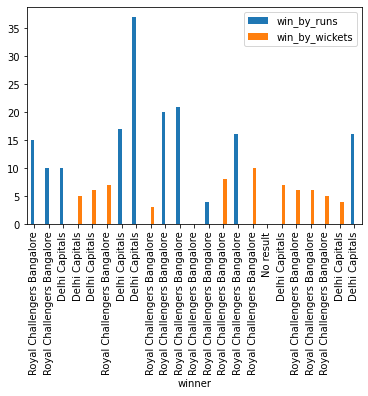

In [15]:
#Lets look at how each tean won the matches 
import matplotlib.pyplot as plt
df_RCB_DC = df_RCB_DC[['win_by_runs','win_by_wickets','winner']]
df_RCB_DC.plot( "winner", kind="bar")



*   Actually there is not much difference between batting first of bowling first because both teams won equal number of matches while chasing and while defending.
*   Anyway RCB won 8 more matches, 8 is not a small number. I can say RCB was dominated against DC in the past.

So i am predicting in today match also RCB will win.



### Q2) How many batsman in the match, from both teams, will have strike rate more than 130 and hit more tham 3 boundaries of which atleast 2 boundaries should be 4s.

In [32]:
df_DCvsRCB = df_deliveries[((df_deliveries['batting_team'] == 'Royal Challengers Bangalore') & (df_deliveries['bowling_team'] == 'Delhi Capitals')) |
                           ((df_deliveries['batting_team'] == 'Delhi Capitals') & (df_deliveries['bowling_team'] == 'Royal Challengers Bangalore'))]

#Calcualting number of runs scored by each batsman in every DC vs RCB match  
df_runs = df_DCvsRCB.groupby(['match_id','batsman'])['batsman_runs'].sum()
df_runs = df_runs.to_frame().reset_index()

#Calcualting number of balls faced by each batsman in every DC vs RCB match  
df_DCvsRCB_ballsfaced = df_DCvsRCB[(df_DCvsRCB['wide_runs'] == 0) & (df_DCvsRCB['noball_runs'] == 0)]
df_balls_faced = df_DCvsRCB_ballsfaced.groupby(['match_id','batsman'])['ball'].count()
df_balls_faced = df_balls_faced.to_frame().reset_index()
df_balls_faced.rename(columns={'ball':'balls_faced'}, inplace = True)

#Calculating how many boundaries they scored
df_boundaries = df_DCvsRCB[(df_DCvsRCB['batsman_runs'] == 4) | (df_DCvsRCB['batsman_runs'] == 6)]
df_boundaries = df_boundaries.groupby(['match_id','batsman'])['batsman_runs'].count()
df_boundaries = df_boundaries.to_frame().reset_index()
df_boundaries.rename(columns={'batsman_runs':'no_of_boundaries'}, inplace = True)

#Calculating number fours scored by batsman
df_4s = df_DCvsRCB[(df_DCvsRCB['batsman_runs'] == 4)]
df_4s = df_4s.groupby(['match_id','batsman'])['batsman_runs'].count()
df_4s = df_4s.to_frame().reset_index()
df_4s.rename(columns={'batsman_runs':'no_of_4s'}, inplace = True)

print(df_runs.head(2))
print("\n")
print(df_balls_faced.head(2))
print('\n')
print(df_boundaries.head(2))
print('\n')
print(df_4s.head(2))

   match_id   batsman  batsman_runs
0         5  A Mishra             8
1         5   AP Tare            18


   match_id   batsman  balls_faced
0         5  A Mishra           14
1         5   AP Tare           17


   match_id   batsman  no_of_boundaries
0         5   AP Tare                 3
1         5  CH Gayle                 1


   match_id   batsman  no_of_4s
0         5   AP Tare         3
1         5  CH Gayle         1


In [34]:
#Now we can merge above 4 dataframes on match id and batsman
df_strike_rate = df_runs.merge(df_balls_faced, how = 'outer', on = ['match_id', 'batsman'])
df_strike_rate = df_strike_rate.merge(df_boundaries, how = 'outer', on = ['match_id', 'batsman'])
df_strike_rate = df_strike_rate.merge(df_4s, how = 'outer', on = ['match_id', 'batsman'])
#Filling null values with 0
df_strike_rate.fillna(0, inplace = True)

#Now calculating Strike rate of every batsman in each match
df_strike_rate['strike_rate'] = round(((df_strike_rate['batsman_runs'] / df_strike_rate['balls_faced']) * 100),2)
df_strike_rate.head()

,match_id,batsman,batsman_runs,balls_faced,no_of_boundaries,no_of_4s,strike_rate
0,5,A Mishra,8,14,0.0,0.0,57.14
1,5,AP Tare,18,17,3.0,3.0,105.88
2,5,CH Gayle,6,8,1.0,1.0,75.00
3,5,CH Morris,4,5,0.0,0.0,80.00
4,5,CR Brathwaite,1,5,0.0,0.0,20.00


According to question we have take only plyers who faced more than 10 balls and has strike rate greater than 130 and number of boundaries is more than 3 and he has to hiy atlest 2 fours.

In [35]:
#Filtering players with balls_faced > 10, strike rate>130 and boundaries > 3

df_players = df_strike_rate[(df_strike_rate['strike_rate'] > 130) & (df_strike_rate['no_of_boundaries'] > 3) &
                             (df_strike_rate['balls_faced'] > 10) & (df_strike_rate['no_of_4s'] >= 2)]

df_players.head() 

,match_id,batsman,batsman_runs,balls_faced,no_of_boundaries,no_of_4s,strike_rate
7,5,KM Jadhav,69,37,10.0,5.0,186.49
11,5,RR Pant,57,36,7.0,3.0,158.33
29,55,RR Pant,45,33,5.0,3.0,136.36
39,76,G Gambhir,86,53,12.0,11.0,162.26
42,76,LRPL Taylor,29,15,5.0,3.0,193.33


In [37]:
#Now calculating how many matches they played against each other
no_of_matches_played = df_DCvsRCB['match_id'].nunique()
print("Number of matches played by DC and RCB against each other is :", no_of_matches_played,"\n")

#Now calculating how many batsman has statisfies given condition in each match
no_of_palyers_satisfies_condn = df_players['strike_rate'].count()
print("Number players has strike rate above 130, ball faced is >10, atlest 2 fours and number of boundaries is >3 is :",no_of_palyers_satisfies_condn,"\n")

avg = no_of_palyers_satisfies_condn/no_of_matches_played
print("average no_of players has statisfies given condition for each match is : ",int(avg))

Number of matches played by DC and RCB against each other is : 23 

Number players has strike rate above 130, ball faced is >10, atlest 2 fours and number of boundaries is >3 is : 65 

average no_of players has statisfies given condition for each match is :  2


**Conclusion :-**



*   According to above analysis 2 players in each DC vs RCB match satisfying given conditions.
*   But now-a-days t20 become batsman game. So i am going with atleast 3 batsman will staisfies given conditions.



### Q3) How many balls will Kagiso Rabada to get his first wicket?

In [18]:
#Filtering Rabada all matches in IPL
df_rabada = df_deliveries[(df_deliveries['bowler'] == 'K Rabada')]

#Now filtering matches where Rabada got atleast 1 wicket in a match
df_rabada_wickets = df_rabada[(df_rabada['player_dismissed'] != 'No Wicket') & (df_rabada['dismissal_kind'] != 'run out')]

total_matches = df_rabada['match_id'].nunique()
matches_with_1wicket = df_rabada_wickets['match_id'].nunique()

print("Number of matches played by Kagiso Rabada in IPL is : ", total_matches,'\n')
print("Number of matches Kagiso Rabada got atleast 1 wicket in match is : ", matches_with_1wicket)

Number of matches played by Kagiso Rabada in IPL is :  18 

Number of matches Kagiso Rabada got atleast 1 wicket in match is :  16


In [20]:
#Filtering out Rabada balls excluding No balls and wide balls
#I know runouts cant count in bowlers wickets but in rabada bowling very few batsman got runout.

df_Rabada = df_deliveries[(df_deliveries['bowler'] == 'K Rabada') & (df_deliveries['wide_runs'] == 0)
                                                                     & (df_deliveries['noball_runs'] == 0)]

balls_list = df_Rabada['ball'].to_list()
wickets_list = df_Rabada['player_dismissed'].to_list()
matchid_list = df_Rabada['match_id'].to_list()

listoflists = []
listoflists.append(matchid_list)
listoflists.append(balls_list)
listoflists.append(wickets_list)

Rabada_balls_bowled = []
Rabada_matchID = []
balls_bowled = 0

for i in range(len(listoflists[0])-1):
     balls_bowled = balls_bowled + 1
     if listoflists[0][i] != listoflists[0][i-1]:
        balls_bowled = 0
     if listoflists[0][i] not in Rabada_matchID and listoflists[2][i] != 'No Wicket':   
            Rabada_balls_bowled.append(balls_bowled+1)
            Rabada_matchID.append(listoflists[0][i])
            balls_bowled = 0
            
#Printing number of balls bowled by Rabada in each match for getting his first wicket
print("Rabada balls bowled for 1st wicket  =",Rabada_balls_bowled,'\n')
print("Corresponding Matchid           =",Rabada_matchID)

Rabada balls bowled for 1st wicket  = [12, 2, 1, 15, 14, 19, 11, 15, 12, 6, 10, 14, 13, 5, 1, 11] 

Corresponding Matchid           = [24, 31, 41, 44, 11139, 11141, 11146, 11149, 11152, 11311, 11317, 11321, 11325, 11328, 11331, 11337]


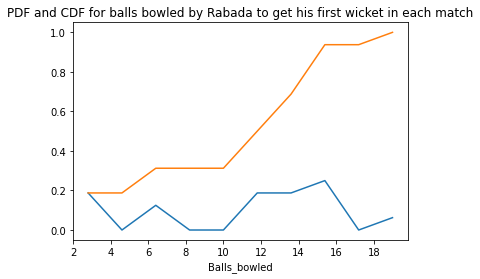

In [21]:
#Converting above two lists into dataframe
df_Rabada_ballsbowled_1stwicket =  pd.DataFrame(list(zip(Rabada_matchID, Rabada_balls_bowled)), columns =['match_id', 'balls_bowled_1stwicket']) 

import numpy as np
import matplotlib.pyplot as plt
leg = ["PDF", "CDF"]
counts, bin_edges = np.histogram(df_Rabada_ballsbowled_1stwicket['balls_bowled_1stwicket'], bins=10,
                                density = True)
pdf = counts/(sum(counts))
cdf = np.cumsum(pdf)
plt.plot(bin_edges[1:],pdf)
plt.plot(bin_edges[1:], cdf)

plt.title("PDF and CDF for balls bowled by Rabada to get his first wicket in each match")
plt.xlabel('Balls_bowled')
plt.show();


**Conclusion :-**



*   Probability is very high from 10 to 16 balls and if you observe CDF clearly his wickets percentage also increased drastically from 10 to 16 balls.
*  He is a death bowler, he will bowl atlest 1-2 overs in the death i.e his 3rd and 4th over.

So according to above analysis he will take wicket in his 3rd over. 



### How many bowlers in the match will have economy rate less than 8?

In [22]:
#Calculating number of runs given by bowler in each match.
#wides,no-balls,penalty runs and batsman runs are go against the bowler cocnceeded runs.
df_bowlers = df_deliveries.groupby(['match_id','bowler'], as_index=False)['batsman_runs','wide_runs','noball_runs','penalty_runs'].sum()
df_bowlers['runs_conceded'] = df_bowlers['batsman_runs'] + df_bowlers['wide_runs'] + df_bowlers['noball_runs'] + df_bowlers['penalty_runs']

#We want only runs conceeded column along with bowler and match_id
df_runs_conceded = df_bowlers[['match_id','bowler','runs_conceded']]

df_runs_conceded.head(3)

,match_id,bowler,runs_conceded
0,1,A Choudhary,55
1,1,A Nehra,42
2,1,B Kumar,27


In [23]:
#Calcualting number of balls bowled by bowler in each match
df_balls = df_deliveries[(df_deliveries['wide_runs'] == 0) & (df_deliveries['noball_runs'] == 0)]
df_balls = df_balls.groupby(['match_id','bowler'])['ball'].count()
df_balls = df_balls.to_frame().reset_index()
df_balls.rename(columns={'ball':'balls_bowled'}, inplace=True)
df_balls.head(3)

,match_id,bowler,balls_bowled
0,1,A Choudhary,24
1,1,A Nehra,24
2,1,B Kumar,24


In [24]:
#Now we can merge above dataframes 
df_economy_rate = df_runs_conceded.merge(df_balls, how = 'outer', on = ['match_id', 'bowler'])
#Now calcualting economy rate by using above two dataframes
df_economy_rate['economy_rate'] = round((df_economy_rate['runs_conceded'] / df_economy_rate['balls_bowled'])*6,2)
df_economy_rate.head(2)

,match_id,bowler,runs_conceded,balls_bowled,economy_rate
0,1,A Choudhary,55,24.0,13.75
1,1,A Nehra,42,24.0,10.50




*   I calculated economy rate of all the bowlers in IPL. But i want to see the economy rate of only bowlers who are playing in today match
*   So i am expecting Rabada,Nortje, Ashwin, Axer patel and Harshel patel are 5 bowlers from Delhi team.



*   From RCB team Chahal, Morris, Siraj, Saini and Wasington sunder are 5 bowlers who are expected to play in today match.
*   In question clearly mentioned that bowler has to bowl more than 2 overs. I.e also i am taking into consideration.





In [30]:
#Filtering current DC and RCB bowlers and they have to bowl more than 2 overs i.e more than 12 balls.
#Anrich Nortje playing his first IPL instead of him i am taking Marcus stoins(All rounder).
df_economy_rate_RCBDC = df_economy_rate[((df_economy_rate['bowler'] == 'YS Chahal') | (df_economy_rate['bowler'] == 'CH Morris') |
                                        (df_economy_rate['bowler'] == 'Washington Sundar') | (df_economy_rate['bowler'] == 'N Saini') |
                                        (df_economy_rate['bowler'] == 'Mohammed Siraj') | (df_economy_rate['bowler'] == 'K Rabada') |
                                        (df_economy_rate['bowler'] == 'R Ashwin') | (df_economy_rate['bowler'] == 'AR Patel') |
                                        (df_economy_rate['bowler'] == 'HV Patel') | (df_economy_rate['bowler'] == 'MP Stoinis')) &
                                        (df_economy_rate['balls_bowled'] > 12)]

df_economy_rate_RCBDC.head()  

,match_id,bowler,runs_conceded,balls_bowled,economy_rate
13,1,YS Chahal,22,24.0,5.50
39,4,AR Patel,27,24.0,6.75
44,4,MP Stoinis,28,18.0,9.33
52,5,CH Morris,21,24.0,5.25
60,5,YS Chahal,19,24.0,4.75


Text(0, 0.5, 'Density')

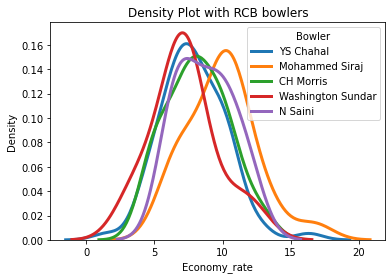

In [28]:
import seaborn as sns
# List of 5 RCB bowlers who are playing today
RCB_bowlers = ['YS Chahal', 'Mohammed Siraj','CH Morris', 'Washington Sundar', 'N Saini']

# Iterate through the 5 RCB bowlers
for bowler in RCB_bowlers:
    # Subset to the bowler
    subset = df_economy_rate_RCBDC[df_economy_rate_RCBDC['bowler'] == bowler]
    
    # Draw the density plot
    sns.distplot(subset['economy_rate'], hist = False, kde = True,
                 kde_kws = {'linewidth': 3},
                 label = bowler)
    
# Plot formatting
plt.legend(prop={'size': 10}, title = 'Bowler')
plt.title('Density Plot with RCB bowlers')
plt.xlabel('Economy_rate')
plt.ylabel('Density')

Text(0, 0.5, 'Density')

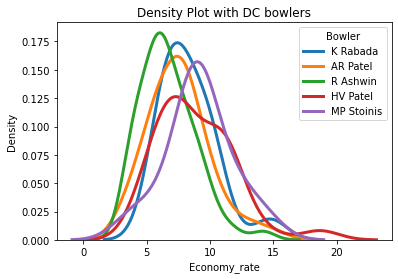

In [31]:
# List of 5 Delhi bowlers who are playing today
DC_bowlers = ['K Rabada', 'AR Patel','R Ashwin', 'HV Patel', 'MP Stoinis']

# Iterate through the 5 DC bowlers
for bowler in DC_bowlers:
    # Subset to the bowler
    subset = df_economy_rate_RCBDC[df_economy_rate_RCBDC['bowler'] == bowler]
    
    # Draw the density plot
    sns.distplot(subset['economy_rate'], hist = False, kde = True,
                 kde_kws = {'linewidth': 3},
                 label = bowler)
    
# Plot formatting
plt.legend(prop={'size': 10}, title = 'Bowler')
plt.title('Density Plot with DC bowlers')
plt.xlabel('Economy_rate')
plt.ylabel('Density')

**Conclusion :-**



*   From RCB bowlers density plot i can say that Washington sunder and Chahal has economy rate is less than 8 in most of the matches.
*   From DC bowlers density plot i can say Ravi ashwin economy rate is less than 8 in almost every match and Axer patel also have economy less than 8 in most of the  matches.

So according to above analysis i am predicting 4 bowlers will have economy less than 8 in today match.

